Goal: Understand endangered species nationally. Data from several national parks from the National Park Service will be used to understand patterns related to certain species becoming endangered. Data was obtained, curated, and provided to me by Codecademy for the project. Begin by importing libraries. 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Load data for EDA.

In [2]:
obvs = pd.read_csv("C:/Users/morel/Documents/GitHub/biodiversity/observations.csv")
print(obvs.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [3]:
spec = pd.read_csv("C:/Users/morel/Documents/GitHub/biodiversity/species_info.csv")
print(spec.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


Understand cleaning needs. Print how many null values in every column.

In [4]:
#shows how many null values in each column
print(obvs.scientific_name.isna().value_counts(), obvs.park_name.isna().value_counts(), obvs.observations.isna().value_counts(), spec.category.isna().value_counts(), spec.scientific_name.isna().value_counts(), spec.common_names.isna().value_counts(), spec.conservation_status.isna().value_counts())

scientific_name
False    23296
Name: count, dtype: int64 park_name
False    23296
Name: count, dtype: int64 observations
False    23296
Name: count, dtype: int64 category
False    5824
Name: count, dtype: int64 scientific_name
False    5824
Name: count, dtype: int64 common_names
False    5824
Name: count, dtype: int64 conservation_status
True     5633
False     191
Name: count, dtype: int64


In [5]:
print(spec.conservation_status.value_counts())

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


In table obvs, there are no missing values. In table spec, column conservation_status has 5633 missing values. From spec.conservation_status.value_counts() other values are "Species of Concern" (161), "Endangered" (16), "Threatened" (10), "In Recovery" (4): 191 total. Lists of conservation statuses elsewhere include "Least Concern", these 5600-odd species appear to have 'no conservations status'. Fill them with "Least Concern".

In [6]:
#fill in null values with value indicating not protected
spec.conservation_status.fillna("Least Concern", inplace = True)
print(spec.conservation_status.value_counts())

conservation_status
Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


C:\Users\morel\AppData\Local\Temp\ipykernel_19572\3432421909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spec.conservation_status.fillna("Least Concern", inplace = True)


In [7]:
#find duplicated values
print(obvs.duplicated().value_counts(), spec.duplicated().value_counts())

False    23281
True        15
Name: count, dtype: int64 False    5824
Name: count, dtype: int64


There are 15 dupliacted observations in obvs and no duplicated observations in spec. Remove duplicates

In [8]:
obvs = obvs.drop_duplicates()
print(obvs.duplicated().value_counts())

False    23281
Name: count, dtype: int64


With data cleaned: which animals have which conservation status? significant difference in conservation status? mode species at each park.

In [9]:
#number of species counted per conservation_status and category. conservation_status column pivoted to be column headings. Table option 1, best for displaying, easiest for audience to read.
type_by_status = spec.groupby(['conservation_status', 'category']).scientific_name.count().reset_index().pivot(columns='conservation_status', index='category', values='scientific_name')
#nulls changed to 0 so row totals can be summed.
type_by_status = type_by_status.fillna(0)
#row totals summed
type_by_status["Total"] = type_by_status.sum(axis=1)
#column totals summed
type_by_status.loc["Total"] = type_by_status.sum()
print(type_by_status)

conservation_status  Endangered  In Recovery  Least Concern  \
category                                                      
Amphibian                   1.0          0.0           73.0   
Bird                        4.0          3.0          442.0   
Fish                        3.0          0.0          116.0   
Mammal                      7.0          1.0          176.0   
Nonvascular Plant           0.0          0.0          328.0   
Reptile                     0.0          0.0           74.0   
Vascular Plant              1.0          0.0         4424.0   
Total                      16.0          4.0         5633.0   

conservation_status  Species of Concern  Threatened   Total  
category                                                     
Amphibian                           4.0         2.0    80.0  
Bird                               72.0         0.0   521.0  
Fish                                4.0         4.0   127.0  
Mammal                             28.0         2.0   214.0

161 species are "Species of Concern". One Mammal species is "In Recovery".

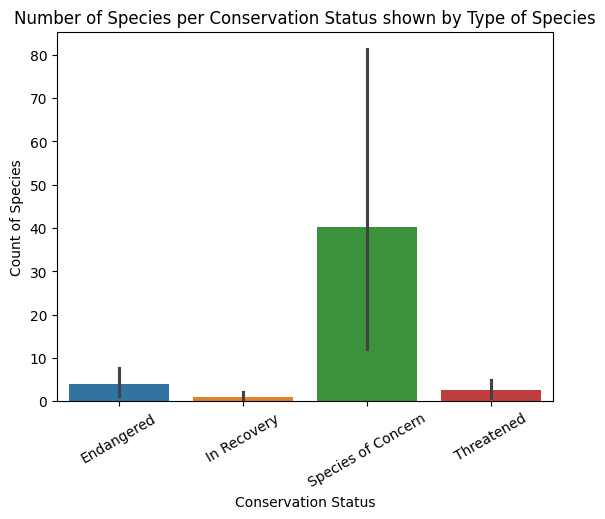

<Figure size 640x480 with 0 Axes>

In [10]:
#barplot option 1 shows the total counts retrieved above not including counts of species in "least Concern" and "Total" because the preponderence of unprotected species and a total number throws off the scale and makes the other counts unreadable.
sns.barplot(data=type_by_status.loc[:, ~type_by_status.columns.isin(["Least Concern", "Total"])], legend='auto')
plt.xlabel('Conservation Status')
plt.xticks(rotation=30)
plt.ylabel('Count of Species')
plt.title('Number of Species per Conservation Status shown by Type of Species')
plt.show()
plt.clf()

In [11]:
#number of species counted per conservation_status and category. long, tidy form for richer chart.
type_by_status_long = spec.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
print(type_by_status_long)

             category conservation_status  scientific_name
0           Amphibian          Endangered                1
1           Amphibian       Least Concern               73
2           Amphibian  Species of Concern                4
3           Amphibian          Threatened                2
4                Bird          Endangered                4
5                Bird         In Recovery                3
6                Bird       Least Concern              442
7                Bird  Species of Concern               72
8                Fish          Endangered                3
9                Fish       Least Concern              116
10               Fish  Species of Concern                4
11               Fish          Threatened                4
12             Mammal          Endangered                7
13             Mammal         In Recovery                1
14             Mammal       Least Concern              176
15             Mammal  Species of Concern               

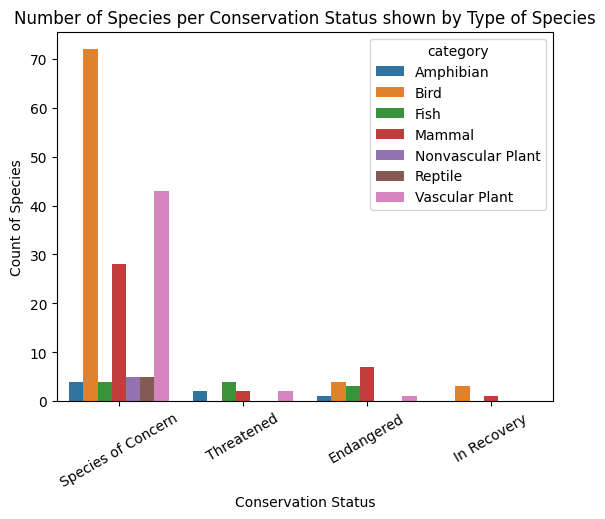

<Figure size 640x480 with 0 Axes>

In [12]:
#barplot 2 best for displaying, more information for audience, matches table 1 best.
#shows number of species per conservation status and type of species. not including Least Concern due to scale.
sns.barplot(y="scientific_name", x="conservation_status", hue="category", data=type_by_status_long[type_by_status_long["conservation_status"] != "Least Concern"], legend='auto', order=["Species of Concern", "Threatened", "Endangered", "In Recovery"])
plt.xlabel('Conservation Status')
plt.xticks(rotation=30)
plt.ylabel('Count of Species')
plt.title('Number of Species per Conservation Status shown by Type of Species')
plt.show()
plt.clf()

Birds, vascular plants, and mammals are the categories showing the most species classified as "Species of Concern". No birds are "Threatened" and fish are the category of species most "Threatened". Mammals, birds, and fish are the types of species most often "Endangered". Birds and mammals are the only species "In Recovery". Now, to understand the significance of these differences.

In [13]:
#new column created: protected dummy. species with "least Concern" = False. species with protected status (ex. "Endangered") = True
spec['protected'] = spec['conservation_status'] != "Least Concern"
print(spec.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole       Least Concern   
1                              American Bison, Bison       Least Concern   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...       Least Concern   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)       Least Concern   
4                                      Wapiti Or Elk       Least Concern   

   protected  
0      False  
1      False  
2      False  
3      False  
4      False  


In [14]:
#number of protected vs unprotected species in each category counted, protected column pivoted to be column headings
protected = spec.groupby(['category', 'protected']).scientific_name.count().reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()
protected.columns = ['category', 'not_protected', 'protected']
print(protected)

            category  not_protected  protected
0          Amphibian             73          7
1               Bird            442         79
2               Fish            116         11
3             Mammal            176         38
4  Nonvascular Plant            328          5
5            Reptile             74          5
6     Vascular Plant           4424         46


In [15]:
#column added: percent protected, shows proportion of species that are protected
protected['percent protected'] = protected.protected / (protected.protected + protected.not_protected) * 100
print(protected)

            category  not_protected  protected  percent protected
0          Amphibian             73          7           8.750000
1               Bird            442         79          15.163148
2               Fish            116         11           8.661417
3             Mammal            176         38          17.757009
4  Nonvascular Plant            328          5           1.501502
5            Reptile             74          5           6.329114
6     Vascular Plant           4424         46           1.029083


Birds and mammals are the two categories most likely to have a conservation status and be protected species. Plants are the least likely to be protected. Understand the significance in the difference.

In [16]:
#binomial test for signigicance
#shows significance between two prportions of small numbers where the category is the same
from scipy.stats import binomtest
#column added to save p-value showing significance
#list comprehension runs binomial test and returns p-value for each row in a list of rows from df protected
protected['p_value'] = [binomtest(row['protected'], (row['protected']+row['not_protected']), p=0.5, alternative='two-sided').pvalue for index, row in protected.iterrows()]
print(protected)

            category  not_protected  protected  percent protected  \
0          Amphibian             73          7           8.750000   
1               Bird            442         79          15.163148   
2               Fish            116         11           8.661417   
3             Mammal            176         38          17.757009   
4  Nonvascular Plant            328          5           1.501502   
5            Reptile             74          5           6.329114   
6     Vascular Plant           4424         46           1.029083   

        p_value  
0  5.795101e-15  
1  3.311366e-62  
2  2.883015e-23  
3  2.011800e-22  
4  3.842469e-90  
5  7.981385e-17  
6  0.000000e+00  


For each category, there is a significant difference in the number of protected and unprotected species (p_values < .05). Meaning each percent of protected species is significantly low. More significance tests: chi_2 whether the means of two groups each with a control and treatment are significantly different.

In [17]:
#chi_2 good for means of more than one group undergoing the same treatments and control conditions.
from scipy.stats import chi2_contingency as chi

In [18]:
#use .loc to pull rows from protected for a df to give to chi for testing. row 1 = Bird, row 3 = Mammal.
test1 = protected.loc[[1, 3], ['not_protected','protected']]
print(test1)

   not_protected  protected
1            442         79
3            176         38


In [19]:
#run chi on df for testing
chi2, p, dof, expected = chi(test1)
print(chi2, p, dof, expected)

0.5810483277947567 0.445901703047197 1 [[438.06530612  82.93469388]
 [179.93469388  34.06530612]]


Birds and mammals have no statistical difference between them (0.44 > .05). They are equally as likely to be protected as each other as not. Next mammals and amphibians, there is a large gap between mammals & birds and the remaining categories with amphibians being the third most protected.

In [20]:
#another chi-2, amphibians and mammals
test2 = protected.loc[[0,3], ['not_protected','protected']]
chi2, p, dof, expected = chi(test2)
print(test2, chi2, p, dof, expected)

   not_protected  protected
0             73          7
3            176         38 2.982497748001351 0.08416928847464537 1 [[ 67.75510204  12.24489796]
 [181.24489796  32.75510204]]


Mammals and amphibians have no statistical difference between them (0.08 > 0.05). They are equally as liekly to be protected as each other as not. Fish are the fourth most protected category.

In [21]:
#same, mammals and fish
test3 = protected.loc[[2,3], ['not_protected','protected']]
chi2, p, dof, expected = chi(test3)
print(test3, chi2, p, dof, expected)

   not_protected  protected
2            116         11
3            176         38 4.644937895246063 0.0311452640827806 1 [[108.75073314  18.24926686]
 [183.24926686  30.75073314]]


Mammals and fish are statistically different from each other (.03 < .05). Mammals are statistically more likely to be protected than fish and likely all the remaining categories.

In [22]:
#function to run a chi_2 as desired.
#library imported
from scipy.stats import chi2_contingency as chi
#function defined, takes 2 names of categories to test and name of df where categories are located
#must update cat_col and value_cols if using a df other than protected. df could be required to have cat_col = category and value_cols = control, treatment
def chi_test(cat_str_1, cat_str_2, df, cat_col='category', value_cols=['not_protected','protected']):
    #test to make sure given categories are in df and can be used for chi_2
    if cat_str_1 not in df[cat_col].values or cat_str_2 not in df[cat_col].values:
        #ValueError displays categories that are available in the df provided to be used in the chi_2
        raise ValueError(f"One or both categories not found. Check spelling and that the category of interest is available: {df[cat_col].values}")
    #test df with only categories of interest created for chi_2 to run on
    filter_rows = protected[protected[cat_col].isin([cat_str_1, cat_str_2])]
    #rows with similar categories summed in case many rows have the same category
    test = filter_rows.groupby(cat_col)[value_cols].sum().values
    #chi-2 run
    chi2, p, dof, expected = chi(test)
    #resutls returned
    return chi2, p, dof, expected
#function used to determine if difference between birds and reptiles in significant
chi_test('Bird', 'Reptile', protected)

(3.742911272135716,
 0.053031969869125097,
 1,
 array([[448.06,  72.94],
        [ 67.94,  11.06]]))

The number of protected Bird species and the number of protected Reptile species are not siginificantly different from each other (p > 0.05). The above function takes three inputs and returns chi2_contingency values. The first and second inputs are strings that should be categories of species. The third is a dataframe, in this case the "protected" df, so that the difference in number of protected species can be tested for significance. If a different df is provided, "cat_col" must be updated to the column containing the names of the categories and "value_cols" must be updated to the columns containing the frequency observations that will be tested for significance. The first two inputs must also be categories that are actually found in the category column of the new df. If the category names provided as the first two inputs are not found in the df's category column, a ValueError raises. The ValueError explains to pick categories that are available. filter_rows is a new df that only has the chosen rows. Rows are added to filter_rows if the value in their category column is one of the catorgories of interest. test is a new df that sums rows from filter_rows together if they have the same category value. This ensures there are two categories and two treatments for the chi2 test, even if more than two rows were pulled by filter_rows based on the categories of interest. The chi2 test is run. The results of the chi2 test are returned.

In [23]:
#column added to hae easier access to genus name to answer question "which species are in which park".
#genus and species name in "scientific_name" split, genus saved in new column
obvs['genus'] = obvs.scientific_name.str.split(' ', expand=True)[0]
#new df shows the total number of observations of each genus in each park
find_max = obvs.groupby(['park_name', 'genus']).observations.sum().reset_index()
print(find_max)

                   park_name        genus  observations
0        Bryce National Park        Abies           301
1        Bryce National Park  Abietinella           101
2        Bryce National Park      Abronia            92
3        Bryce National Park     Abutilon            84
4        Bryce National Park     Acalypha           361
...                      ...          ...           ...
6375  Yosemite National Park      Zenaida           123
6376  Yosemite National Park    Zigadenus           722
6377  Yosemite National Park        Zizia           531
6378  Yosemite National Park  Zonotrichia           910
6379  Yosemite National Park      Zygodon           369

[6380 rows x 3 columns]


In [24]:
#most abundant species in each park found
#for each unique park name
for park in find_max.park_name.unique():
    #find the index of the genus name in that park that has the highet number of observations
    index = find_max[find_max.park_name == park].observations.idxmax()
    #print the row for the index, showing park, genus, observations
    print(find_max.loc[index])

park_name       Bryce National Park
genus                         Carex
observations                  21574
Name: 269, dtype: object
park_name       Great Smoky Mountains National Park
genus                                         Carex
observations                                  16437
Name: 1864, dtype: object
park_name       Yellowstone National Park
genus                               Carex
observations                        54083
Name: 3459, dtype: object
park_name       Yosemite National Park
genus                            Carex
observations                     33236
Name: 5054, dtype: object


Carex is the most often observed genus in all four national parks. There are 21574 sightings in Bryce National Park, 16437 sightings in Great Smoky Mountains National Park, 54083 sightings in Yellowstone National Park, and 33236 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [25]:
#finds the common name related to the genus above
#look through each unique scientific_name
for name in spec.scientific_name.unique():
    #if the genus name matches the scientific_name
    if 'Carex' in name:
        #print the common_names related to that species name
        print(spec.common_names[spec.scientific_name == name])

1947    Carex, Sedge, Sedge Species, Sedges
Name: common_names, dtype: object
1948    Thicket Sedge
Name: common_names, dtype: object
1949    Summer Sedge
Name: common_names, dtype: object
1950    Glomerate Sedge
Name: common_names, dtype: object
1951    Whitetinge Sedge
Name: common_names, dtype: object
1952    Sedge
Name: common_names, dtype: object
1953    Sedge
Name: common_names, dtype: object
1954    Emmons Sedge, Sedge
Name: common_names, dtype: object
1955    Greenish-White Sedge, Light-Colored Sedge
Name: common_names, dtype: object
1956    A Sedge, Sedge
Name: common_names, dtype: object
1957    Eastern Narrowleaf Sedge
Name: common_names, dtype: object
1958    A Sedge, Rigid Sedge
Name: common_names, dtype: object
1959    Turgid Sedge
Name: common_names, dtype: object
1960    A Sedge, Sedge
Name: common_names, dtype: object
1961    Appalachian Sedge
Name: common_names, dtype: object
1962    Prickly Bog Sedge
Name: common_names, dtype: object
1963    Sedge
Name: common_names,

Sedges species of the genus Carex and are the most common species overall seen in these four national parks.

In [26]:
#doing it again but merged original data tables obvs and spec together to learn how to and make breaking down by "category" easier
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
#reptiles is a df that chooses only rows with reptiles as the "category" so the most common reptile n each park can be found
reptiles = overview[overview.category == 'Reptile']
#observations summed by park and genus in a new df
find_max = reptiles.groupby(['park_name', 'genus']).observations.sum().reset_index()
#look through each unique park name
for park in find_max.park_name.unique():
    #find the index of the row with that park name and the largest number of observations
    index = find_max[find_max.park_name == park].observations.idxmax()
    #print the whole row (park, genus name, and observations) with the largest number of observations to find the most common genus in each park
    print(find_max.loc[index])

park_name       Bryce National Park
genus                  Lampropeltis
observations                    854
Name: 21, dtype: object
park_name       Great Smoky Mountains National Park
genus                                  Lampropeltis
observations                                    707
Name: 59, dtype: object
park_name       Yellowstone National Park
genus                        Lampropeltis
observations                         1960
Name: 97, dtype: object
park_name       Yosemite National Park
genus                     Lampropeltis
observations                      1153
Name: 135, dtype: object


Lampropeltis is the most often observed reptile genus in all four national parks. There are 854 sightings in Bryce National Park, 707 sightings in Great Smoky Mountains National Park, 1960 sightings in Yellowstone National Park, and 1153 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [27]:
#find the common_name of the most common reptile
for name in spec.scientific_name.unique():
    if 'Lampropeltis' in name:
        print(spec.common_names[spec.scientific_name == name])

371    Kingsnakes, Milk Snakes
Name: common_names, dtype: object
372    Mole Kingsnake
Name: common_names, dtype: object
373    Eastern Kingsnake
Name: common_names, dtype: object
374    Black Kingsnake
Name: common_names, dtype: object
375    Scarlet Kingsnake
Name: common_names, dtype: object
376    Eastern Milk Snake
Name: common_names, dtype: object
4583    California Kingsnake
Name: common_names, dtype: object
4584    Sierra Mountain Kingsnake
Name: common_names, dtype: object


Lampropeltis are Kingsnakes. They are the most often observed reptile in these 4 national parks.

In [28]:
#do it again to find the least common reptile genus name in each park
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
reptiles = overview[overview.category == 'Reptile']
find_min = reptiles.groupby(['park_name', 'genus']).observations.sum().reset_index()
for park in find_min.park_name.unique():
    index = find_min[find_min.park_name == park].observations.idxmin()
    print(find_max.loc[index])

park_name       Bryce National Park
genus                   Masticophis
observations                     78
Name: 22, dtype: object
park_name       Great Smoky Mountains National Park
genus                                  Aspidoscelis
observations                                     36
Name: 41, dtype: object
park_name       Yellowstone National Park
genus                              Regina
observations                          210
Name: 104, dtype: object
park_name       Yosemite National Park
genus                     Aspidoscelis
observations                       123
Name: 117, dtype: object


The least commonly seen reptile genuses in these four national parks are: Masticohpis in Bryce National Park with 78 sightings, Aspidoscelis in Great Smokey Mountains National Park with 36 sightings, Regina in Yellowstone National Park with 210 sightings, and, again, Aspidoscelis also in Yosemite National Park with 123 sightings.

In [29]:
#find the common_name of the least common reptile in each park
for name in spec.scientific_name.unique():
    if 'Aspidoscelis' in name:
        #prints common_name and conservation_status
        print(spec.common_names[spec.scientific_name == name], overview.conservation_status[overview.scientific_name == name])

4594    California (Western) Whiptail
Name: common_names, dtype: object 20402    Least Concern
20403    Least Concern
20404    Least Concern
20405    Least Concern
Name: conservation_status, dtype: object


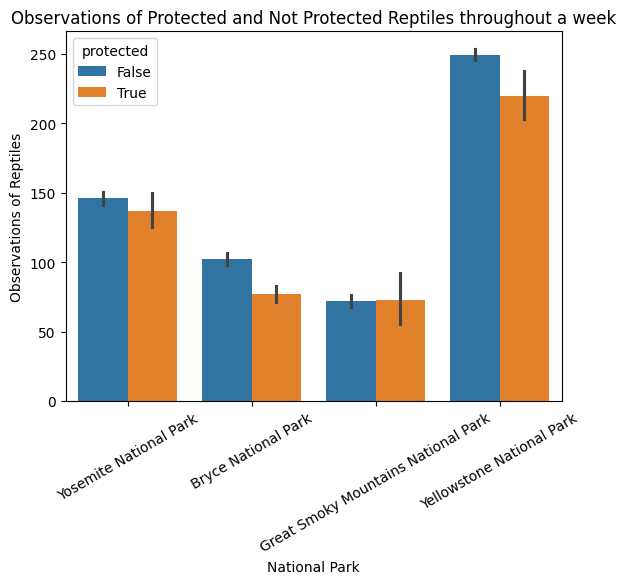

In [30]:
#barplot shows the observations of unprotected vs protected reptiles in each park
sns.barplot(x=reptiles.park_name, y=reptiles.observations, hue=reptiles.protected)
plt.xlabel('National Park')
plt.ylabel('Observations of Reptiles')
plt.title('Observations of Protected and Not Protected Reptiles throughout a week')
plt.xticks(rotation = 30)
plt.show()
plt.close()

In [31]:
#doing it a third time. looking for the most often seen protected species in each park.
#recreate df called overview: practice also setting myself to write a function for these
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
#column called protected switched from boolean (True/False) to string ("Yes"/"No"). maybe not necessary, was easier to use.
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
#df most_protected created having only protected species in it
most_protected = overview[overview.protected == 'Yes']
#df most_protected created to sum all the observations of a genus per park
find_max = most_protected.groupby(['park_name', 'genus']).observations.sum().reset_index()
#looking through each unique park name
for park in find_max.park_name.unique():
    #to find the index of the row containing the genus with the largest number of observations for that park
    index = find_max[find_max.park_name == park].observations.idxmax()
    #print the row at that index showing park_name, genus, observations
    print(find_max.loc[index])

park_name       Bryce National Park
genus                        Myotis
observations                   2164
Name: 91, dtype: object
park_name       Great Smoky Mountains National Park
genus                                        Myotis
observations                                   1319
Name: 240, dtype: object
park_name       Yellowstone National Park
genus                              Myotis
observations                         4774
Name: 389, dtype: object
park_name       Yosemite National Park
genus                           Myotis
observations                      2871
Name: 538, dtype: object


Myotis is the most often observed protected genus in all four national parks. There are 2164 sightings in Bryce National Park, 1319 sightings in Great Smoky Mountains National Park, 4774 sightings in Yellowstone National Park, and 2871 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [32]:
#find the common_name of associated with the genus found above
for name in spec.scientific_name.unique():
    if 'Myotis' in name:
        print(spec.common_names[spec.scientific_name == name])

33    Mississippi Myotis, Southeastern Myotis
Name: common_names, dtype: object
34    Gray Myotis
Name: common_names, dtype: object
35    Keen's Myotis
Name: common_names, dtype: object
36    Eastern Small-Footed Bat, Eastern Small-Footed...
Name: common_names, dtype: object
37                  Little Brown Bat, Little Brown Myotis
3042    Little Brown Bat, Little Brown Myotis, Little ...
4467                                  Little Brown Myotis
Name: common_names, dtype: object
38    Northern Long-Eared Bat, Northern Myotis
Name: common_names, dtype: object
39    Indiana Bat, Indiana Or Social Myotis
Name: common_names, dtype: object
3039    California Myotis, California Myotis, Californ...
4465                                    California Myotis
Name: common_names, dtype: object
3040    Small-Footed Myotis, Western Small-Footed Bat,...
4466                                  Small-Footed Myotis
Name: common_names, dtype: object
3041    Long-Eared Myotis, Long-Eared Myotis
Name: common

Myotis are bats. They are the most often observed protected species in these four national parks.

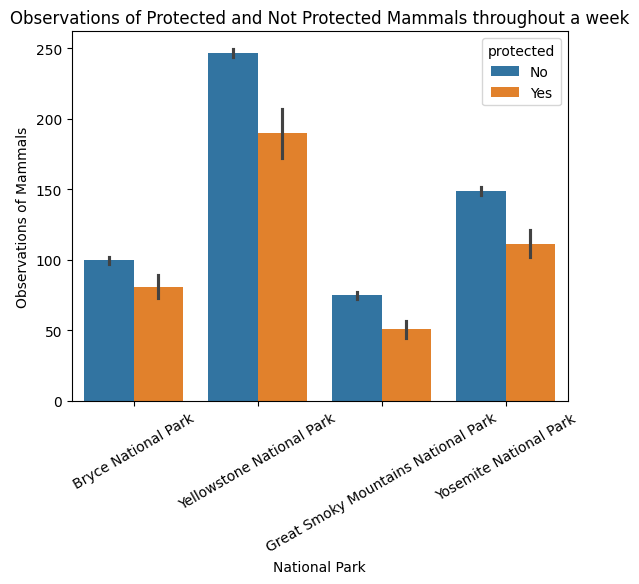

In [33]:
#barplot shows the observations of protected vs. unprotected mammals in each park
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
mammals = overview[overview.category == 'Mammal']
sns.barplot(x=mammals.park_name, y=mammals.observations, hue=mammals.protected)
plt.xlabel('National Park')
plt.ylabel('Observations of Mammals')
plt.title('Observations of Protected and Not Protected Mammals throughout a week')
plt.xticks(rotation = 30)
plt.show()
plt.close()

Protected mammals are seen less often than unprotected mammals.

In [34]:
#and a fourth time, time to write that function. least often seen protected species this time
#practicing merging again
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
#practicing this again
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
#sticking with only protected species
most_protected = overview[overview.protected == 'Yes']
#looking for the LEAST seen protected species at each park
find_min = most_protected.groupby(['park_name', 'genus']).observations.sum().reset_index()
#look through each unique park name
for park in find_min.park_name.unique():
    #to find index containing genus with lowest number of observations
    index = find_min[find_min.park_name == park].observations.idxmin()
    #print entire row
    print(find_max.loc[index])

park_name       Bryce National Park
genus                    Chasmistes
observations                     23
Name: 33, dtype: object
park_name       Great Smoky Mountains National Park
genus                                          Grus
observations                                     13
Name: 212, dtype: object
park_name       Yellowstone National Park
genus                                Grus
observations                           57
Name: 361, dtype: object
park_name       Yosemite National Park
genus                       Chasmistes
observations                        35
Name: 480, dtype: object


There are two least often observed protected genuses. Chasmistes was sighted 23 times in Bryce National Park and 35 times in Yosemite National Park. Grus was sighted 13 times in Great Smokey Mountains National Park and 57 times in Yellowstone National Park. Find common names.

In [35]:
#find the common name of one of the least often seen protected species
for name in spec.scientific_name.unique():
    if 'Chasmistes' in name:
        print(spec.common_names[spec.scientific_name == name])

3275    June Sucker
Name: common_names, dtype: object


Chasmistes are June Suckers, a species of fish.

In [36]:
#and the common name of the other
for name in spec.scientific_name.unique():
    if 'Grus' in name:
        print(spec.common_names[spec.scientific_name == name])

173    Whooping Crane
Name: common_names, dtype: object
174    Sandhill Crane
Name: common_names, dtype: object


Grus are species of crane.

In [37]:
#function to replicate the results above: most or least often seen unprotected or protected species in each park
#define function and inputs. df input as data, protected = yes or no, stat = min or max, category default set to none, can be set to any category found in df 
def find_species(data, protected, stat, category=None):
    #empty dictionary created
    species_dict = {}
    #boolean in protected column switched to yes and no
    data['protected'] = data['protected'].replace({True: 'Yes', False: 'No'})
    #check for category input and whether category is available to be filtered by
    if category != None and category in data.category.values:
        #df filtered by category
        data = data[data.category == category]
    #when the category doesn't exist
    else:
        #valueError is raised to indicated available categories
        raise ValueError(f"Make sure category is available: {data.category.unique()}")
    #check protected value. if only protected rows wished
    if protected == 'Yes':
        #new df filtered to show only protected rows and sum the observations of the same genus
        find = data[data.protected == 'Yes'].groupby(['park_name', 'genus']).observations.sum().reset_index()
    #otherwise only unprotected rows wished
    elif protected == 'No':
        #new df filtered to show only unprotected rows and sum the observations of the same genus
        find = data[data.protected == 'No'].groupby(['park_name', 'genus']).observations.sum().reset_index()
    #if protected input not recognized
    else:
        #valueError raised to encourage recognizable input
        raise ValueError(f'Make sure protected is input as "Yes" or "No".')  
    #stat input checked. if the most often seen genus in each park is wished
    if stat == 'max':
        #each unique park name is checked in newest df
        for park in find.park_name.unique():
            #the index of the greatest number of observations in each park is identified
            index = find[find.park_name == park].observations.idxmax()
            #the name of the park, number of observations at the index (must be the max possible number of observations), and a list of common names of
            #the genus are saved to the dictionary with key = park: values = observations, list of [common names].
            #the common names are found in the original df. the genus at the index of max observations is compared to the genus column in the original df.
            #each unique common name that corresponds to that genus is added to the list.
            species_dict[park] = [find.loc[index].observations, [data.common_names[find.loc[index].genus == data.genus].unique()]]
        #the dictionary is returned to the function call so it can be displayed
        #ex.
        #{park1: [observations, [common_name1, common_name2]], park2: [observations, [common_name1, common_name2, common_name3]], park3:....}
        return species_dict
    #same as aboe but with .idxmin() to find the least often seen species (their observations and common names) for each park
    elif stat == 'min':
        for park in find.park_name.unique():
            index = find[find.park_name == park].observations.idxmin()
            species_dict[park] = [find.loc[index].observations, [data.common_names[find.loc[index].genus == data.genus].unique()]]
        return species_dict
    #if stat input not recognized
    else:
        #valueError raised to encourage recognizable input
        raise ValueError(f'Make sure stat is input as "max" or "min".')
#function called to display the least often seen protected species of bird in each park.
find_species(data=overview, protected='Yes', stat='min', category='Bird')
#there were 24 Sandhill Crane sightings in Bryce National Park, 13 sightings of the same bird in Great Smoky Mountain National Park,
#57 sightings of Sandhill Cranes in Yellowstone National Park, and 37 sightings also of the Sandhill Crane in Yosemite National Park.

{'Bryce National Park': [24,
  [array(['Whooping Crane', 'Sandhill Crane'], dtype=object)]],
 'Great Smoky Mountains National Park': [13,
  [array(['Whooping Crane', 'Sandhill Crane'], dtype=object)]],
 'Yellowstone National Park': [57,
  [array(['Whooping Crane', 'Sandhill Crane'], dtype=object)]],
 'Yosemite National Park': [37,
  [array(['Whooping Crane', 'Sandhill Crane'], dtype=object)]]}

Conclusions: Only 191 species had a conservaiton status and the remaining 5600-odd were not protected. Mammals were significantly more likely to be protected than every category expect birds. Birds and mammals had similar proportions of protected speices. Sedges were the most spotted species overall and kingsnakes were the most spotted reptile species. Both were most often spotted in Yellowstone National park. Also msot often spotted in Yellowstone National Park are bat species which are the protected species that is most often spottted (4774 sightings in Yellowstone). Out of the protected species, there are two that are least often seen. A fish called the June Sucker was only seen 35 times at the most at Yosemite National Park and 23 times at the least at Bryce National Park. The least often seen species were cranes: seen only 13 times in Great Smokey Mountains National Park but also 57 times at Yellowstone National Park. These two species were not seen at all in each other's parks.